In [1]:
import pandas as pd
import scipy as sp
import scipy.optimize
import numba
import iminuit
import probfit
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext ipycache
%config InlineBackend.figure_format = 'svg'
exec(open('settings.py').read(), globals())

/home/fabian/anaconda2/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/home/fabian/anaconda2/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/home/fabian/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Cell cycle length and cell cycle parameters analysis

The following pandas DataFrame contains the data of the fraction of BrdU-labeled cells for different cell populations and different times of continuous BrdU treatment. Missing data is represented by sp.nan. The columns are defined as follows:


|Column Name|Definition|
|-|-|
|time|time after start of BrdU injections|
|labeling_fraction|the fraction of BrdU-labeled cells|
|cell population|specific cell population under study (uninjured, non-regenerating or regenerating, see Fig. 2e)|


In [2]:
lf_data = pd.DataFrame()
lf_data['time'] = [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 50.0, 50.0, 50.0, 50.0, 50.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 98.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 217.0, 217.0, 217.0, 217.0, 217.0, 217.0, 217.0, 217.0, 217.0, 308.0, 308.0, 308.0, 308.0, 308.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 123.0, 123.0, 123.0, 123.0, 170.0, 170.0, 170.0, 170.0, 170.0, 220.0, 220.0, 220.0, 314.0, 314.0, 314.0, 314.0, 314.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 123.0, 123.0, 123.0, 123.0, 123.0]
lf_data['labeling_fraction'] = [0.313, 0.216, 0.39400000000000002, 0.36599999999999999, 0.31900000000000001, 0.36399999999999999, 0.26900000000000002, 0.248, 0.35199999999999998, 0.21299999999999999, 0.371, 0.47199999999999998, 0.44400000000000001, 0.46800000000000003, 0.34000000000000002, 0.36299999999999999, 0.34699999999999998, 0.32600000000000001, 0.5, 0.55800000000000005, 0.38400000000000001, 0.38300000000000001, 0.496, 0.51300000000000001, 0.54600000000000004, 0.60199999999999998, 0.67900000000000005, 0.68899999999999995, 0.44, 0.51100000000000001, 0.63200000000000001, 0.55500000000000005, 0.59399999999999997, 0.69199999999999995, 0.77500000000000002, 0.65900000000000003, 0.71399999999999997, 0.74299999999999999, 0.78400000000000003, 0.80100000000000005, 0.65300000000000002, 0.77100000000000002, 0.83799999999999997, 0.83499999999999996, 0.76900000000000002, 0.82799999999999996, 0.79100000000000004, 0.85299999999999998, 0.79900000000000004, 0.70299999999999996, 0.78700000000000003, 0.754, 0.78700000000000003, 0.84799999999999998, 0.79200000000000004, 0.248, 0.247, 0.34399999999999997, 0.441, 0.40000000000000002, 0.38400000000000001, 0.34799999999999998, 0.25900000000000001, 0.42399999999999999, 0.505, 0.42599999999999999, 0.5, 0.46300000000000002, 0.44900000000000001, 0.51400000000000001, 0.46300000000000002, 0.57199999999999995, 0.61399999999999999, 0.59499999999999997, 0.63, 0.63500000000000001, 0.64300000000000002, 0.67000000000000004, 0.60599999999999998, 0.54000000000000004, 0.54500000000000004, 0.59299999999999997, 0.56000000000000005, 0.55100000000000005, 0.59999999999999998, 0.72499999999999998, 0.70399999999999996, 0.59599999999999997, 0.55700000000000005, 0.67500000000000004, 0.629, 0.72299999999999998, 0.69299999999999995, 0.54100000000000004, 0.66300000000000003, 0.68400000000000005, 0.749, 0.76200000000000001, 0.65000000000000002, 0.61399999999999999, 0.81899999999999995, 0.83299999999999996, 0.83099999999999996, 0.74299999999999999, 0.77600000000000002, 0.83499999999999996, 0.82199999999999995, 0.83799999999999997, 0.79400000000000004, 0.86399999999999999, 0.70499999999999996, 0.59999999999999998, 0.61399999999999999, 0.64000000000000001, 0.70699999999999996, 0.67800000000000005, 0.70099999999999996, 0.65500000000000003, 0.64100000000000001, 0.70899999999999996, 0.78900000000000003, 0.752, 0.79600000000000004, 0.66800000000000004, 0.72499999999999998, 0.71599999999999997, 0.72899999999999998, 0.81299999999999994, 0.79900000000000004, 0.81499999999999995, 0.86799999999999999, 0.874, 0.77900000000000003, 0.76800000000000002, 0.871, 0.85399999999999998, 0.81299999999999994, 0.84099999999999997, 0.88900000000000001, 0.94999999999999996, 0.89900000000000002, 0.94899999999999995, 0.86599999999999999, 0.94199999999999995, 0.81499999999999995, 0.92400000000000004, 0.92100000000000004, 0.93999999999999995, 0.93500000000000005, 0.95099999999999996, 0.97199999999999998, 0.98899999999999999, 0.97699999999999998, 0.95599999999999996, 0.97699999999999998, 0.98399999999999999, 1.0, 0.98799999999999999, 1.0, 0.99199999999999999, 0.94499999999999995, 1.0, 1.0, 1.0, 0.97599999999999998, 0.97599999999999998, 0.95699999999999996]
lf_data['cell_population'] = ['uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'uninjured', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'non-regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating', 'regenerating']

Here the standard deviation for each cell population and time point is estimated:

In [3]:
lf_data = lf_data.set_index(['cell_population', 'time'])
lf_data['delta'] = lf_data.groupby(level = ['cell_population', 'time']).std()
lf_data = lf_data.reset_index('time')

### Model of BrdU incorporation

A model based on the model for the BrdU-labeling fraction proposed by [Lefevre et al., 2013](http://dx.doi.org/10.1016/j.jtbi.2013.08.033) with an extension for an initial growth fraction  was used to estimate the cell cycle length parameters. It is implemented as follows:

In [4]:
@numba.autojit
def brdu_model(t, TS, TC, TG2M, r, GF):
    """ BrdU-labeling fraction model for BrdU incorporation in vivo.
        Based on Lefevre et al., 2013 and extended with an initial
        growth fraction.
        
        t    ... time after start of BrdU labeling
        TS   ... length of S-Phase
        TC   ... cell cycle length
        TG2M ... combined length of G2- and M-Phase
        r    ... mean number of daughter cells after cell division remaining
                 in the population
        GF   ... initial growth fraction
        
        Lefevre, J., Marshall, D. J., Combes, A. N., Ju, A. L., Little, M. H.
        & Hamilton, N. A. (2013). Modelling cell turnover in a complex tissue
        during development. Journal of Theoretical Biology, 338, 66-79.
    """
    if TG2M < 0:
        return sp.nan
    if TS + TG2M > TC:
        return sp.nan
    else:
        if r==1:
            if t < TC - TS:
                return GF * (t + TS) / TC
            else:
                return GF
        else:
            # calculate the growth fraction at time t
            g = ( ( GF * r ** (t / TC) ) / ( GF * r ** (t / TC) + (1 - GF) ) )
            if t < TG2M:
                return  g * ((r ** ( ( TG2M + TS ) / TC ) - r ** (( TG2M - t ) / TC) ) / (r - 1.0) )
            elif t < TC - TS:
                return g * (1.0 - ( r ** ( ( TC + TG2M - t ) / TC ) - r ** ( ( TG2M  + TS) / TC ) ) / (r - 1.0) )
            else:
                return g

In [5]:
@numba.autojit
def brdu_model_relative(t, rTS, TC, rTG2M, GF):
    TS = rTS * TC
    r = 2.0
    TG2M = rTG2M * (TC - TS)
    return brdu_model(t, TS, TC, TG2M, r, GF)

### Bootstrapping

In [6]:
lf_data_reg = lf_data.query('cell_population == "regenerating"')[['time', 'labeling_fraction']].reset_index(drop=True)

In [7]:
sample = lambda group: group['labeling_fraction'].sample(frac = 1.0, replace = True)

In [8]:
%%cache bootstrap.pkl results TCs --cachedir ./cache/
N = 10000
Ns = 10
TCs = []
results = []

for i in range(N):
    sample_data = lf_data_reg.groupby('time').apply(sample).reset_index(level = 'time').reset_index(drop = True)
    chi2 = probfit.Chi2Regression(brdu_model_relative,\
                                  sp.array(sample_data['time']),\
                                  sp.array(sample_data['labeling_fraction']))
    # chi2('rTS', 'TC', 'rTG2M', 'GF')
    ranges = [(0, 1), (50, 200), (0, 0.1), (0, 1)]

    res = sp.optimize.brute(lambda x: chi2(*x), ranges, Ns = Ns)
    results.append(res)
    TCs.append(res[1])

[Skipped the cell's code and loaded variables TCs, results from file '/media/500G/fabian/work/axolotl/git/Rost-Rodrigo-Albors-et-al.-2016/calculations/cache/bootstrap.pkl'.]


In [9]:
results = pd.DataFrame(results)
results.columns = ['rTS', 'TC', 'rTG2M', 'GF']
results.mean()

rTS        0.744465
TC       117.662439
rTG2M      0.035827
GF         0.951233
dtype: float64

117.662439395 12.849218206


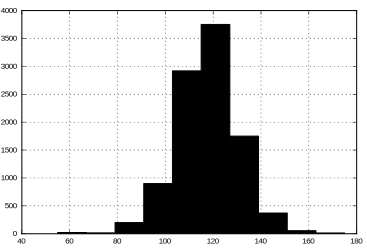

In [10]:
TCs = pd.Series(TCs)
TCs.hist()
print TCs.mean(), TCs.std()

In [11]:
TCdays = TCs / 24.0

In [12]:
TCdays.to_csv('../data/TC6d.csv', index=False)

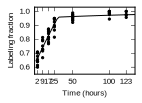

In [35]:
fig, ax = plt.subplots(figsize = (1.8,1.2))
ax.scatter(lf_data_reg['time'], lf_data_reg['labeling_fraction'], marker = '.', color = 'black')
time = sp.linspace(0, 140)
ax.plot(time, sp.vectorize(brdu_model_relative)(time, *list(results.mean())), color = 'black')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Labeling fraction', labelpad=10)
ax.set_xlim(-2, 135)
# ax.set_xticks(sp.arange(0, 101, 50))
ax.set_xticks(lf_data_reg['time'].unique())
# ax.set_xticks(sp.arange(0, 101, 50) + 25, minor=True)
ax.set_ylim(0.55, 1.03)
plt.savefig('../figure_plots/labeling_fraction_time.svg')
plt.show()

array([   2.,    9.,   17.,   25.,   50.,  100.,  123.])